<a href="https://colab.research.google.com/github/Nahuelito22/Data_StoryTelling_Ghilardi/blob/main/PrediccionAgricolaColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos Predictivos para la Producción Agrícola Basados en el Clima

## Introducción

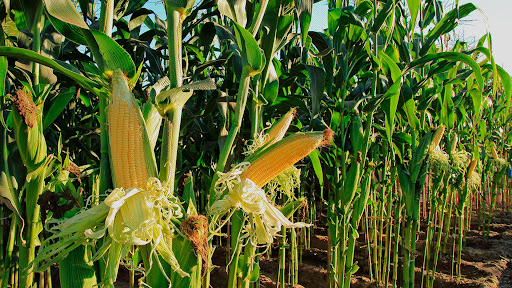

Este proyecto tiene como objetivo desarrollar un modelo predictivo para la producción agrícola de maíz, utilizando datos históricos de producción y climáticos. A lo largo del análisis, se ha recopilado un conjunto de datos que incluye variables clave como la producción de maíz, el rendimiento, el área cosechada y la temperatura promedio anual, entre otros.

Se ha llevado a cabo un proceso de imputación para manejar los valores faltantes en la temperatura media, agrupando por país y aplicando técnicas de interpolación y media. Esto es crucial, ya que la producción de maíz está altamente correlacionada con las condiciones climáticas, y se espera que estas variables influyan significativamente en la capacidad de producción agrícola en diferentes regiones.



## Hipotesis

__________________________________________________________

Hipótesis sobre la influencia del clima:

* ¿La producción agrícola es más sensible a las fluctuaciones en la temperatura media anual en países tropicales que en países templados?
* ¿Las anomalías de temperatura tienen un impacto significativo en la producción de maíz en regiones con poca resiliencia climática?


Hipótesis sobre el rendimiento y el clima:
* ¿El rendimiento agrícola (Performance) disminuye a medida que las temperaturas superan los valores medios históricos de cada país?

Hipótesis sobre las áreas cosechadas:
* ¿La relación entre el área cosechada y la producción es no lineal, siendo más eficiente en climas templados que en climas extremos?

________________________________________________________________________________________

Como se observa surgen varias preguntas en relacion a la produccion agricola, su rendimiento o el area donde se cosecha. Pero una de las mas importantes, ya que puede tener implicancias importantes y economicamente favoranbles es:



> **¿Se puede predecir la produccion de una cosecha respecto al clima?**



## Subida de Datasets

Subida de librerias para manejo de datos y visualizacion

In [ ]:
# Importar librerias para analisis de datos, normalizacion y visualisacion.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Cargamos los datasets desde GitHub, estos datasets fueron previmente normalizados para que el dataset tenga un mejor entendimiento y sea mas fluida su lectura.
La informacion se descargo desde el sitio https://www.fao.org/faostat

**FAOSTAT** (Food and Agriculture Organization of the United Nations)

Es uno de los entes mas releventes en cuanto al estudio de la agricultura o ganaderia refiere.

Los datasets utilizados son:

**produccionMaiz**:
Contiene datos sobre la producción, rendimiento y área cosechada de maíz en cada país del mundo desde 1980 hasta 2022.

**temperaturasAnuales**:
Incluye datos sobre la temperatura media anual de cada país desde 1980 hasta 2022.

**cambioClimatico**:
Proporciona información sobre los grados de cambio climático experimentados desde 1980 hasta 2022.

**costoProduccion**:
Contiene datos sobre el costo de producción en USD por tonelada desde 1980 hasta 2022.

**usoDeTierra**:
Incluye datos sobre el porcentaje de tierra utilizada para la agricultura en cada país desde 1980 hasta 2022.

**fertilizantesUtilizados**:
Contiene información sobre el uso de fertilizantes, medido en kilogramos por hectárea, desde 1980 hasta 2022.


In [ ]:
# Cargamos los Datasets desde Github
produccionMaiz= pd.read_csv('https://raw.githubusercontent.com/Nahuelito22/Data_StoryTelling_Ghilardi/refs/heads/main/Maiz_1980_2022.csv')
temperaturasAnuales= pd.read_csv('https://raw.githubusercontent.com/Nahuelito22/Data_StoryTelling_Ghilardi/refs/heads/main/TemperaturasAnuales_1980_2022.csv')
cambioClimatico= pd.read_csv('https://raw.githubusercontent.com/Nahuelito22/Data_StoryTelling_Ghilardi/refs/heads/main/CambioClimatico_1980_2022.csv')
costoProduccion= pd.read_csv('https://raw.githubusercontent.com/Nahuelito22/Data_StoryTelling_Ghilardi/refs/heads/main/CostoProducir_1991_2022.csv')
usoDeTierra = pd.read_csv('https://raw.githubusercontent.com/Nahuelito22/Data_StoryTelling_Ghilardi/refs/heads/main/UsoDeTierra_1980_2022.csv')
fertilizantesUtilizados= pd.read_csv('https://raw.githubusercontent.com/Nahuelito22/Data_StoryTelling_Ghilardi/refs/heads/main/FertilizantesUtilizados_1980_2022.csv')

## Normalizacion de datos

Observamos el datasets principal y verificamos si tiene nulos

In [ ]:
produccionMaiz

,Ámbito,Área,Elemento,Producto,Año,Unidad,Valor,Símbolo,Descripción del Símbolo
0,Cultivos y productos de ganadería,Afganistán,Área cosechada,Maíz,1980,ha,450000.0,E,Valor estimado
1,Cultivos y productos de ganadería,Afganistán,Rendimiento,Maíz,1980,kg/ha,1671.1,E,Valor estimado
2,Cultivos y productos de ganadería,Afganistán,Producción,Maíz,1980,toneladas,752000.0,E,Valor estimado
3,Cultivos y productos de ganadería,Afganistán,Área cosechada,Maíz,1981,ha,420000.0,E,Valor estimado
4,Cultivos y productos de ganadería,Afganistán,Rendimiento,Maíz,1981,kg/ha,1669.0,E,Valor estimado
...,...,...,...,...,...,...,...,...,...
20458,Cultivos y productos de ganadería,Zimbabwe,Rendimiento,Maíz,2021,kg/ha,1534.4,A,Cifra oficial
20459,Cultivos y productos de ganadería,Zimbabwe,Producción,Maíz,2021,toneladas,1469664.0,A,Cifra oficial
20460,Cultivos y productos de ganadería,Zimbabwe,Área cosechada,Maíz,2022,ha,1000000.0,E,Valor estimado
20461,Cultivos y productos de ganadería,Zimbabwe,Rendimiento,Maíz,2022,kg/ha,1500.0,E,Valor estimado


Eliminamos columnas innecesarias como Ambito, Producto, Simbolo y Descripción del Símbolo

In [ ]:
produccionMaiz.drop(['Ámbito', 'Producto', 'Símbolo', 'Descripción del Símbolo'], axis=1, inplace=True)

In [ ]:
# Verificamos como quedo
produccionMaiz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20463 entries, 0 to 20462
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Área      20463 non-null  object 
 1   Elemento  20463 non-null  object 
 2   Año       20463 non-null  int64  
 3   Unidad    20463 non-null  object 
 4   Valor     20463 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 799.5+ KB


In [ ]:
# Separamos cada elemento en una columna unica

# Filtrar los datos para incluir solo los elementos de interés
produccionMaiz = produccionMaiz[produccionMaiz['Elemento'].isin(['Producción', 'Área cosechada', 'Rendimiento'])]
produccion_Maiz_Pivot = produccionMaiz.pivot_table(index=['Área', 'Año'],
                                               columns='Elemento',
                                               values='Valor',
                                               aggfunc='sum').reset_index()

# Eliminar el nombre del índice de columnas
produccion_Maiz_Pivot.columns.name = None

# Renombrar las columnas para evitar acentos
produccion_Maiz_Pivot.rename(columns={'Área':'Country','Año':'Year','Producción': 'Production',
                                  'Área cosechada': 'Harvested_area',
                                  'Rendimiento': 'Performance'}, inplace=True)

Generamos una tabla pivot para poder ver cada variable como columna unica , ademas a esta tabla se le cambian los nombres para una mejor lectura de los datos y para luego poder relizar los merge.

In [ ]:
produccion_Maiz_Pivot

,Country,Year,Production,Performance,Harvested_area
0,Afganistán,1980,752000.0,1671.1,450000.0
1,Afganistán,1981,701000.0,1669.0,420000.0
2,Afganistán,1982,663000.0,1665.8,398000.0
3,Afganistán,1983,639000.0,1664.1,384000.0
4,Afganistán,1984,608000.0,1661.2,366000.0
...,...,...,...,...,...
6856,Zimbabwe,2018,1560100.0,1350.6,1155075.0
6857,Zimbabwe,2019,773976.0,780.7,991354.0
6858,Zimbabwe,2020,1202347.0,1180.1,1018884.0
6859,Zimbabwe,2021,1469664.0,1534.4,957793.0


Comrpobamos si tiene nulos

In [ ]:
produccion_Maiz_Pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6861 entries, 0 to 6860
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6861 non-null   object 
 1   Year            6861 non-null   int64  
 2   Production      6861 non-null   float64
 3   Performance     6743 non-null   float64
 4   Harvested_area  6859 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 268.1+ KB


Ademas visualizamos si hay valores en 0

In [ ]:
# Visualizamos si tiene nulos o valores en 0
produccion_Maiz_Pivot.isnull().sum()

,0
Country,0
Year,0
Production,0
Performance,118
Harvested_area,2


Vemos el porcentaje de nulos para decidir que estrategia utilizamos.

In [ ]:
# Saber cuanto porcentaje de datos es nulo
# Calcular el porcentaje de valores nulos por columna
null_percentage = produccion_Maiz_Pivot.isnull().mean() * 100
print(null_percentage)

Country           0.000000
Year              0.000000
Production        0.000000
Performance       1.719866
Harvested_area    0.029150
dtype: float64


Como vemos, tenemos dos columnas con nulos, una contiene 1.7 % y la otra 0.02 %.

Por eso, se decide imputar los datos ya que al ser un porcentaje bajo no afecta significativamente la muestra general.

In [ ]:
produccion_Maiz_Pivot['Performance'].fillna(produccion_Maiz_Pivot['Performance'].median(), inplace=True)
produccion_Maiz_Pivot['Harvested_area'].fillna(produccion_Maiz_Pivot['Harvested_area'].median(), inplace=True)

<ipython-input-11-fa384e465a57>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  produccion_Maiz_Pivot['Performance'].fillna(produccion_Maiz_Pivot['Performance'].median(), inplace=True)
<ipython-input-11-fa384e465a57>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

Comprobamos que no queden nulos

In [ ]:
# Verirficamos que no queden mas nulos
print(produccion_Maiz_Pivot.isnull().sum())

Country           0
Year              0
Production        0
Performance       0
Harvested_area    0
dtype: int64


Verificamos nuestros proximos datasets para unificar todo en uno solo

In [ ]:
temperaturasAnuales

,Country,Year,Annual Mean,5-yr smooth,Code
0,Dominican Republic,1901,23.71,23.65,DOM
1,Dominican Republic,1902,23.40,23.52,DOM
2,Dominican Republic,1903,23.45,23.38,DOM
3,Dominican Republic,1904,23.03,23.26,DOM
4,Dominican Republic,1905,23.44,23.16,DOM
...,...,...,...,...,...
20735,Switzerland,2018,7.68,7.27,CHE
20736,Switzerland,2019,7.31,7.34,CHE
20737,Switzerland,2020,7.64,7.38,CHE
20738,Switzerland,2021,6.39,7.42,CHE


Eliminamos columnas innecesarias

In [ ]:
temperaturasAnuales

,Country,Year,Annual Mean,5-yr smooth,Code
0,Dominican Republic,1901,23.71,23.65,DOM
1,Dominican Republic,1902,23.40,23.52,DOM
2,Dominican Republic,1903,23.45,23.38,DOM
3,Dominican Republic,1904,23.03,23.26,DOM
4,Dominican Republic,1905,23.44,23.16,DOM
...,...,...,...,...,...
20735,Switzerland,2018,7.68,7.27,CHE
20736,Switzerland,2019,7.31,7.34,CHE
20737,Switzerland,2020,7.64,7.38,CHE
20738,Switzerland,2021,6.39,7.42,CHE


In [ ]:
temperaturasAnuales.drop(['Code', '5-yr smooth'], axis=1, inplace=True)

Verificamos la eliminacion de columnas innecesarias

In [ ]:
# Verificamos como quedo
temperaturasAnuales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20740 entries, 0 to 20739
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      20740 non-null  object 
 1   Year         20740 non-null  int64  
 2   Annual Mean  20740 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 486.2+ KB


In [ ]:
# Verificamos exixtencia de nulos
print(temperaturasAnuales.isnull().sum())

Country        0
Year           0
Annual Mean    0
dtype: int64


Como se observa el datasets, no posee nulos, igualmente se tiene que realizar una normalizacion y seleccionar las fechas del datasets principal(1980-2022)

In [ ]:
# Seleccionamos rango de fecha desde 1980 hasta 2022
temperaturasAnuales_filtrado = temperaturasAnuales[(temperaturasAnuales['Year'] >= 1980) & (temperaturasAnuales['Year'] <= 2022)]
# Restablecer el indice
temperaturasAnuales_filtrado = temperaturasAnuales_filtrado.reset_index(drop=True)
# Verificamos que el filtro haya funcionado correctamente
print(temperaturasAnuales_filtrado['Year'].min(), temperaturasAnuales_filtrado['Year'].max())

1980 2022


In [ ]:
temperaturasAnuales_filtrado

,Country,Year,Annual Mean
0,Dominican Republic,1980,24.52
1,Dominican Republic,1981,24.34
2,Dominican Republic,1982,24.10
3,Dominican Republic,1983,24.61
4,Dominican Republic,1984,23.95
...,...,...,...
7305,Switzerland,2018,7.68
7306,Switzerland,2019,7.31
7307,Switzerland,2020,7.64
7308,Switzerland,2021,6.39


Antes de realizar un merge es necesario validar que ambos datasets comparten una lista de paises correcta

In [ ]:
# Normalizar los nombres de países en ambos datasets
produccion_Maiz_Pivot['Country'] = produccion_Maiz_Pivot['Country'].str.lower().str.strip()
temperaturasAnuales_filtrado['Country'] = temperaturasAnuales_filtrado['Country'].str.lower().str.strip()


Generamos una lista ajustando los valores de los paises.

Esto se realiza para perder la menor cantidad de datos al realizar el merge, ya que los datasets no poseen los mismos nombres en la columna country.

In [ ]:
# Diccionario para corregir los nombres de los países
correcciones = {
    'afganistán': 'Afganistán','albania': 'Albania','alemania': 'Alemania','angola': 'Angola','antigua y barbuda': 'Antigua y Barbuda',
    'arabia saudita': 'Arabia Saudita','argelia': 'Argelia','argentina': 'Argentina','armenia': 'Armenia','australia': 'Australia',
    'austria': 'Austria','azerbaiyán': 'Azerbaiyán','bahamas': 'Bahamas','bangladesh': 'Bangladesh','barbados': 'Barbados',
    'belarús': 'Bielorrusia','belice': 'Belice','benin': 'Benín','bhután': 'Bután','bolivia (estado plurinacional de)': 'Bolivia',
    'bosnia y herzegovina': 'Bosnia y Herzegovina','botswana': 'Botswana','brasil': 'Brasil','bulgaria': 'Bulgaria',
    'burkina faso': 'Burkina Faso','burundi': 'Burundi','bélgica': 'Bélgica','bélgica-luxemburgo': 'Bélgica','cabo verde': 'Cabo Verde',
    'camboya': 'Camboya','camerún': 'Camerún','canadá': 'Canadá','chad': 'Chad','checoslovaq': 'Checoslovaquia','chequia': 'República Checa',
    'chile': 'Chile','china': 'China','china, continental': 'China','china, taiwán provincia de': 'Taiwán','colombia': 'Colombia',
    'comoras': 'Comoras','congo': 'Congo','costa rica': 'Costa Rica','croacia': 'Croacia','cuba': 'Cuba',"côte d'ivoire": 'Costa de Marfil',
    'dinamarca': 'Dinamarca','djibouti': 'Yibuti','dominica': 'Dominica','ecuador': 'Ecuador','egipto': 'Egipto','el salvador': 'El Salvador',
    'emiratos árabes unidos': 'Emiratos Árabes Unidos','eritrea': 'Eritrea','eslovaquia': 'Eslovaquia','eslovenia': 'Eslovenia','españa': 'España',
    'estados unidos de américa': 'Estados Unidos','estonia': 'Estonia','eswatini': 'Eswatini','etiopía': 'Etiopía','etiopía rdp': 'Etiopía',
    'federación de rusia': 'Rusia','fiji': 'Fiyi','filipinas': 'Filipinas','finlandia': 'Finlandia','francia': 'Francia','gabón': 'Gabón',
    'gambia': 'Gambia','georgia': 'Georgia','ghana': 'Ghana','granada': 'Granada','grecia': 'Grecia','guatemala': 'Guatemala','guayana francesa': 'Guayana Francesa',
    'guinea': 'Guinea','guinea-bissau': 'Guinea-Bisáu','guyana': 'Guyana','haití': 'Haití','honduras': 'Honduras','hungría': 'Hungría',
    'india': 'India','indonesia': 'Indonesia','iraq': 'Irak','irlanda': 'Irlanda','irán (república islámica del)': 'Irán','israel': 'Israel',
    'italia': 'Italia','jamaica': 'Jamaica','japón': 'Japón','jordania': 'Jordania','kazajstán': 'Kazajistán','kenya': 'Kenia',
    'kirguistán': 'Kirguistán','kuwait': 'Kuwait','lesotho': 'Lesoto','letonia': 'Letonia','libia': 'Libia','lituania': 'Lituania',
    'luxemburgo': 'Luxemburgo','líbano': 'Líbano','macedonia del norte': 'Macedonia del Norte','madagascar': 'Madagascar','malasia': 'Malasia',
    'malawi': 'Malawi','maldivas': 'Maldivas','malta': 'Malta','malí': 'Malí','marruecos': 'Marruecos','mauricio': 'Mauricio',
    'mauritania': 'Mauritania','micronesia (estados federados de)': 'Micronesia','montenegro': 'Montenegro','mozambique': 'Mozambique',
    'myanmar': 'Birmania','méxico': 'México','namibia': 'Namibia','nepal': 'Nepal','nicaragua': 'Nicaragua','nigeria': 'Nigeria','nueva caledonia': 'Nueva Caledonia',
    'nueva zelandia': 'Nueva Zelanda','níger': 'Níger','omán': 'Omán','pakistán': 'Pakistán','panamá': 'Panamá','papua nueva guinea': 'Papúa Nueva Guinea','paraguay': 'Paraguay','países bajos (reino de los)': 'Países Bajos',
    'perú': 'Perú','polonia': 'Polonia','portugal': 'Portugal','puerto rico': 'Puerto Rico','qatar': 'Catar','reino unido de gran bretaña e irlanda del norte': 'Reino Unido',
    'república centroafricana': 'República Centroafricana','república democrática popular lao': 'Laos','república democrática del congo': 'República del Congo',
    'república dominicana': 'República Dominicana','república popular democrática de corea': 'Corea del Norte','república unida de tanzanía': 'Tanzania',
    'república de corea': 'Corea del Sur','república de moldova': 'Moldavia','república árabe siria': 'Siria','reunión': 'Reunión','rumanía': 'Rumanía',
    'rwanda': 'Ruanda','san vicente y las granadinas': 'San Vicente y las Granadinas','santa lucía': 'Santa Lucía','santo tomé y príncipe': 'Santo Tomé y Príncipe',
    'senegal': 'Senegal','serbia': 'Serbia','serbia y montenegro': 'Serbia','sierra leona': 'Sierra Leona','somalia': 'Somalia','sri lanka': 'Sri Lanka','sudáfrica': 'Sudáfrica','sudán': 'Sudán',
    'sudán (ex)': 'Sudán','sudán del sur': 'Sudán del Sur','suecia': 'Suecia','suiza': 'Suiza','suriname': 'Surinam','tailandia': 'Tailandia','tayikistán': 'Tayikistán','timor-leste': 'Timor-Leste','togo': 'Togo','trinidad y tabago': 'Trinidad y Tobago','turkmenistán': 'Turkmenistán',
    'turquía': 'Turquía','urss': 'Unión Soviética','ucrania': 'Ucrania','uganda': 'Uganda','uruguay': 'Uruguay','uzbekistán': 'Uzbekistán','vanuatu': 'Vanuatu',
    'venezuela (república bolivariana de)': 'Venezuela','viet nam': 'Vietnam','yemen': 'Yemen','yugoslav rfs': 'Yugoslavia','zambia': 'Zambia','zimbabwe': 'Zimbabue'
}

# Cambiar los nombres en el DataFrame
produccion_Maiz_Pivot['Country'] = produccion_Maiz_Pivot['Country'].replace(correcciones)

In [ ]:
# Diccionario para corregir los nombres de los países
correcciones_temperaturas = {
    'dominican republic': 'República Dominicana','united states': 'Estados Unidos','zambia': 'Zambia','vanuatu': 'Vanuatu','tonga': 'Tonga','ghana': 'Ghana',
    'maldives': 'Maldivas','uruguay': 'Uruguay','fiji': 'Fiji','solomon islands': 'Islas Salomón','georgia': 'Georgia','senegal': 'Senegal','gambia': 'Gambia','nauru': 'Nauru',
    'trinidad and tobago': 'Trinidad y Tobago','bangladesh': 'Bangladés','bahrain': 'Bahrein','malta': 'Malta',
    'uzbekistan': 'Uzbekistán','kenya': 'Kenia','chad': 'Chad','libya': 'Libia','estonia': 'Estonia','liberia': 'Liberia',
    'nicaragua': 'Nicaragua','russian federation': 'Federación de Rusia','tanzania': 'Tanzania','south sudan': 'Sudán del Sur',
    'canada': 'Canadá','poland': 'Polonia','mexico': 'México','sweden': 'Suecia','belgium': 'Bélgica','liechtenstein': 'Liechtenstein',
    'thailand': 'Tailandia','korea-': 'Corea','guatemala': 'Guatemala','cambodia': 'Camboya','vietnam': 'Vietnam','finland': 'Finlandia',
    'benin': 'Benin','palau': 'Palau','lesotho': 'Lesoto','jamaica': 'Jamaica','zimbabwe': 'Zimbabue','mali': 'Malí','jordan': 'Jordania','austria': 'Austria',
    'barbados': 'Barbados','south africa': 'Sudáfrica','haiti': 'Haití','togo': 'Togo','hungary': 'Hungría','iraq': 'Irak','rwanda': 'Ruanda','turkey': 'Turquía',
    'romania': 'Rumania','yemen, rep.': 'Yemen','madagascar': 'Madagascar','bolivia': 'Bolivia','germany': 'Alemania','chile': 'Chile','kiribati': 'Kiribati',
    'timor leste': 'Timor-Leste','sudan': 'Sudán','honduras': 'Honduras','oman': 'Omán','grenada': 'Granada','suriname': 'Surinam','belarus': 'Bielorrusia','comoros': 'Comoras',
    'monaco': 'Mónaco','syrian arab republic': 'República Árabe Siria','ethiopia': 'Etiopía','bulgaria': 'Bulgaria','mongolia': 'Mongolia','brazil': 'Brasil',
    'uganda': 'Uganda','djibouti': 'Yibuti','france': 'Francia','qatar': 'Catar','serbia': 'Serbia','gabon': 'Gabón','kuwait': 'Kuwait','japan': 'Japón',
    'nepal': 'Nepal','iceland': 'Islandia','malawi': 'Malawi','afghanistan': 'Afganistán','turkmenistan': 'Turkmenistán','eritrea': 'Eritrea','samoa': 'Samoa','paraguay': 'Paraguay',
    'andorra': 'Andorra','cuba': 'Cuba','united kingdom': 'Reino Unido','malaysia': 'Malasia','new zealand': 'Nueva Zelanda','lebanon': 'Líbano','tajikistan': 'Tayikistán','algeria': 'Argelia',
    'somalia': 'Somalia','kazakhstan': 'Kazajistán','gambia,': 'Gambia','philippines': 'Filipinas','azerbaijan': 'Azerbaiyán','botswana': 'Botswana',
    'sierra leone': 'Sierra Leona','netherlands': 'Países Bajos','dominica': 'Dominica','colombia': 'Colombia','guyana': 'Guyana','mauritius': 'Mauricio',
    'saudi arabia': 'Arabia Saudita','tuvalu': 'Tuvalu','united arab emirates': 'Emiratos Árabes Unidos','nigeria': 'Nigeria','burundi': 'Burundi',
    'panama': 'Panamá','venezuela, rb': 'Venezuela','ukraine': 'Ucrania','portugal': 'Portugal','belize': 'Belice','slovenia': 'Eslovenia','guinea bissau': 'Guinea-Bisáu','luxembourg': 'Luxemburgo',
    'norway': 'Noruega','montenegro': 'Montenegro','peru': 'Perú','pakistan': 'Pakistán','cameroon': 'Camerún','papua new guinea': 'Papúa Nueva Guinea',
    'korea, rep.': 'Corea','moldova': 'Moldavia','armenia': 'Armenia','singapore': 'Singapur','spain': 'España','mozambique': 'Mozambique','seychelles': 'Seychelles','guinea': 'Guinea',
    'bhutan': 'Bután','cyprus': 'Chipre','latvia': 'Letonia','tunisia': 'Túnez','australia': 'Australia','denmark': 'Dinamarca','argentina': 'Argentina',
    'ecuador': 'Ecuador','indonesia': 'Indonesia','sri lanka': 'Sri Lanka','albania': 'Albania','mauritania': 'Mauritania','bahamas,': 'Bahamas','myanmar': 'Myanmar','egypt': 'Egipto','iran, islamic rep.': 'Irán',
    'greece': 'Grecia','israel': 'Israel','congo, dem. rep.':'República Democrática del Congo','niger': 'Níger','central african republic': 'República Centroafricana',
    'italy': 'Italia','slovak republic': 'República Eslovaca','costa rica': 'Costa Rica','eswatini': 'Eswatini', "cote d'ivoire": "Costa de Marfil",
    'kyrgyz republic': 'República Kirguisa','croatia': 'Croacia','angola': 'Angola','switzerland': 'Suiza'
}

# Corregir los nombres en el dataframe
temperaturasAnuales_filtrado['Country'] = temperaturasAnuales_filtrado['Country'].replace(correcciones_temperaturas)

# Opcional: Capitalizar la primera letra de cada palabra
temperaturasAnuales_filtrado['Country'] = temperaturasAnuales_filtrado['Country'].str.title()


Ahora realizamos el merge para unificar ambos datasets

In [ ]:
# Realizamos el marge principal para este proyecto
df_Produccion_Clima=pd.merge(produccion_Maiz_Pivot,temperaturasAnuales_filtrado,on=['Year','Country'])

In [ ]:
df_Produccion_Clima.head()

,Country,Year,Production,Performance,Harvested_area,Annual Mean
0,Afganistán,1980,752000.0,1671.1,450000.0,13.01
1,Afganistán,1981,701000.0,1669.0,420000.0,13.06
2,Afganistán,1982,663000.0,1665.8,398000.0,12.01
3,Afganistán,1983,639000.0,1664.1,384000.0,12.91
4,Afganistán,1984,608000.0,1661.2,366000.0,12.50


Visualizamos los datasets restantes

In [ ]:
cambioClimatico.head()

,Ámbito,Área,Elemento,Meses,Año,Unidad,Valor
0,Variación de temperatura de la superficie terr...,Afganistán,Variación de temperatura,Año meteorológico,1980,°C,0.655
1,Variación de temperatura de la superficie terr...,Afganistán,Variación de temperatura,Año meteorológico,1981,°C,0.558
2,Variación de temperatura de la superficie terr...,Afganistán,Variación de temperatura,Año meteorológico,1982,°C,-0.286
3,Variación de temperatura de la superficie terr...,Afganistán,Variación de temperatura,Año meteorológico,1983,°C,0.240
4,Variación de temperatura de la superficie terr...,Afganistán,Variación de temperatura,Año meteorológico,1984,°C,0.252


Antes de hacer el merge tenemos que cambiar algunos nombres de columnas, quitar columnas innecesarias para evitar sobre cargar el merge y corregir los nombres de los paises con el diccionario previamente creado.

In [ ]:
# Cambiar nombre de las columnas para el merge y un mejor entendimiento
cambioClimatico.rename(columns={'Área':'Country','Año':'Year','Valor':'°C+-'}, inplace=True)
# Normalizamos los datos antes de remplazar
cambioClimatico['Country'] = cambioClimatico['Country'].str.lower().str.strip()
# Eliminar columnas innecesarias para no sobrecargar el merge
cambioClimatico.drop(['Ámbito', 'Elemento', 'Meses', 'Unidad'], axis=1, inplace=True)
# Corregir los nombres en el dataframe
cambioClimatico['Country'] = cambioClimatico['Country'].replace(correcciones)

In [ ]:
cambioClimatico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10163 entries, 0 to 10162
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  10163 non-null  object 
 1   Year     10163 non-null  int64  
 2   °C+-     9652 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 238.3+ KB


In [ ]:
# Merge de los datasets
df_Produccion_Clima_Cambio=pd.merge(df_Produccion_Clima,cambioClimatico,on=['Year','Country'])

In [ ]:
df_Produccion_Clima_Cambio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5358 entries, 0 to 5357
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         5358 non-null   object 
 1   Year            5358 non-null   int64  
 2   Production      5358 non-null   float64
 3   Performance     5358 non-null   float64
 4   Harvested_area  5358 non-null   float64
 5   Annual Mean     5358 non-null   float64
 6   °C+-            5240 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 293.1+ KB


Para el resto de datasets se realizara todo en pocas lineas para no extender demasiado este proceso

In [ ]:
# Dataset actual
costoProduccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3131 entries, 0 to 3130
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ámbito    3131 non-null   object 
 1   Área      3131 non-null   object 
 2   Elemento  3131 non-null   object 
 3   Producto  3131 non-null   object 
 4   Año       3131 non-null   int64  
 5   Meses     3131 non-null   object 
 6   Unidad    3131 non-null   object 
 7   Valor     3131 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 195.8+ KB


In [ ]:
# Cambiar nombre de las columnas para el merge y un mejor entendimiento
costoProduccion.rename(columns={'Área':'Country','Año':'Year','Valor':'US$/Tonelada'}, inplace=True)
# Normalizamos los datos antes de remplazar
costoProduccion['Country'] = costoProduccion['Country'].str.lower().str.strip()
# Eliminar columnas innecesarias para no sobrecargar el merge
costoProduccion.drop(['Ámbito', 'Elemento', 'Producto', 'Meses', 'Unidad'], axis=1, inplace=True)
# Corregir los nombres en el dataframe
costoProduccion['Country'] = costoProduccion['Country'].replace(correcciones)

In [ ]:
# Dataset luego de la normalizacion
costoProduccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3131 entries, 0 to 3130
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       3131 non-null   object 
 1   Year          3131 non-null   int64  
 2   US$/Tonelada  3131 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 73.5+ KB


In [ ]:
# Dataset acutal
usoDeTierra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9309 entries, 0 to 9308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ámbito    9309 non-null   object 
 1   Área      9309 non-null   object 
 2   Elemento  9309 non-null   object 
 3   Producto  9309 non-null   object 
 4   Año       9309 non-null   int64  
 5   Unidad    9309 non-null   object 
 6   Valor     9309 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 509.2+ KB


In [ ]:
# Cambiar nombre de las columnas para el merge y un mejor entendimiento
usoDeTierra.rename(columns={'Área':'Country','Año':'Year','Valor':'% Tierrra'}, inplace=True)
# Normalizamos los datos antes de remplazar
usoDeTierra['Country'] = usoDeTierra['Country'].str.lower().str.strip()
# Eliminar columnas innecesarias para no sobrecargar el merge
usoDeTierra.drop(['Ámbito', 'Elemento', 'Producto', 'Unidad'], axis=1, inplace=True)
# Corregir los nombres en el dataframe
usoDeTierra['Country'] = usoDeTierra['Country'].replace(correcciones)

In [ ]:
# Dataset luego de la normalizacion
usoDeTierra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9309 entries, 0 to 9308
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    9309 non-null   object 
 1   Year       9309 non-null   int64  
 2   % Tierrra  9309 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 218.3+ KB


In [ ]:
# Dataset acutal
fertilizantesUtilizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22303 entries, 0 to 22302
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ámbito    22303 non-null  object 
 1   Área      22303 non-null  object 
 2   Elemento  22303 non-null  object 
 3   Producto  22303 non-null  object 
 4   Año       22303 non-null  int64  
 5   Unidad    22303 non-null  object 
 6   Valor     22303 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ MB


In [ ]:
# Cambiar nombre de las columnas para el merge y un mejor entendimiento
fertilizantesUtilizados.rename(columns={'Área':'Country','Año':'Year','Valor':'KG/Ha'}, inplace=True)
# Normalizamos los datos antes de remplazar
fertilizantesUtilizados['Country'] = fertilizantesUtilizados['Country'].str.lower().str.strip()
# Eliminar columnas innecesarias para no sobrecargar el merge
fertilizantesUtilizados.drop(['Ámbito', 'Elemento', 'Producto','Unidad'], axis=1, inplace=True)
# Corregir los nombres en el dataframe
fertilizantesUtilizados['Country'] = fertilizantesUtilizados['Country'].replace(correcciones)

In [ ]:
# Dataset luego de la normalizacion
fertilizantesUtilizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22303 entries, 0 to 22302
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  22303 non-null  object 
 1   Year     22303 non-null  int64  
 2   KG/Ha    22303 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 522.9+ KB


Realizamos el merge con todos los datesets restantes

In [ ]:
# Merge de los datasets
df_Produccion_Clima_Cambio_Costo=pd.merge(df_Produccion_Clima_Cambio,costoProduccion,on=['Year','Country'])
df_Produccion_Clima_Cambio_Costo_UsoTierra=pd.merge(df_Produccion_Clima_Cambio_Costo,usoDeTierra,on=['Year','Country'])
df_Produccion_Clima_Cambio_Costo_UsoTierra_Fertilizante=pd.merge(df_Produccion_Clima_Cambio_Costo_UsoTierra,fertilizantesUtilizados,on=['Year','Country'])
dfPrediccionAgricola=df_Produccion_Clima_Cambio_Costo_UsoTierra_Fertilizante

Comprobamos como quedo el datasets con todos los merge finalizados

In [ ]:
dfPrediccionAgricola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7347 entries, 0 to 7346
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7347 non-null   object 
 1   Year            7347 non-null   int64  
 2   Production      7347 non-null   float64
 3   Performance     7347 non-null   float64
 4   Harvested_area  7347 non-null   float64
 5   Annual Mean     7347 non-null   float64
 6   °C+-            7132 non-null   float64
 7   US$/Tonelada    7347 non-null   float64
 8   % Tierrra       7347 non-null   float64
 9   KG/Ha           7347 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 574.1+ KB


Comprobamos nulos

In [ ]:
# Calcular el porcentaje de datos nulos
null_percentage = dfPrediccionAgricola.isnull().mean() * 100
print(null_percentage)

Country           0.000000
Year              0.000000
Production        0.000000
Performance       0.000000
Harvested_area    0.000000
Annual Mean       0.000000
°C+-              2.926365
US$/Tonelada      0.000000
% Tierrra         0.000000
KG/Ha             0.000000
dtype: float64


Como se observa un %2.6 de los datos son nulos.

Como paso anteriormente no impacta negativamente en los datos ya que la cantidad de nulos no es significativa para la muestra general, pero en este caso como el clima es una de las variables más significativas para predecir la producción agrícola en este caso usaremos un modelo más robusto de imputación de datos.


Primero agrupamos los datos por país y aplicamos una interpolación para estimar los valores de temperatura faltantes en función de los años. Si aún quedan datos nulos después de la interpolación, los rellenamos con la media de temperatura de cada país. Este enfoque asegura que las diferencias climáticas entre países se respeten, minimizando el impacto negativo en los resultados."

In [ ]:
# Copia el DataFrame original para evitar modificaciones accidentales
dfPrediccionAgricola_imputado = dfPrediccionAgricola.copy()

# Interpolamos por grupos (en este caso, países) y años
dfPrediccionAgricola_imputado['°C+-'] = dfPrediccionAgricola_imputado.groupby('Country')['°C+-'].apply(lambda x: x.interpolate()).reset_index(level=0, drop=True)

# Para los valores nulos que aún queden, los rellenamos con la media de cada país
dfPrediccionAgricola_imputado['°C+-'] = dfPrediccionAgricola_imputado.groupby('Country')['°C+-'].apply(lambda x: x.fillna(x.mean())).reset_index(level=0, drop=True)

Visualizamos como queda el datasets luego de su normalizacion.

In [ ]:
dfPrediccionAgricola_imputado.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7347 entries, 0 to 7346
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7347 non-null   object 
 1   Year            7347 non-null   int64  
 2   Production      7347 non-null   float64
 3   Performance     7347 non-null   float64
 4   Harvested_area  7347 non-null   float64
 5   Annual Mean     7347 non-null   float64
 6   °C+-            7347 non-null   float64
 7   US$/Tonelada    7347 non-null   float64
 8   % Tierrra       7347 non-null   float64
 9   KG/Ha           7347 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 574.1+ KB


## Visualizacion de datos

Primero podrias darnos una idea de como fue avanzando la produccion de maiz a lo largo de los años para los distintos paises

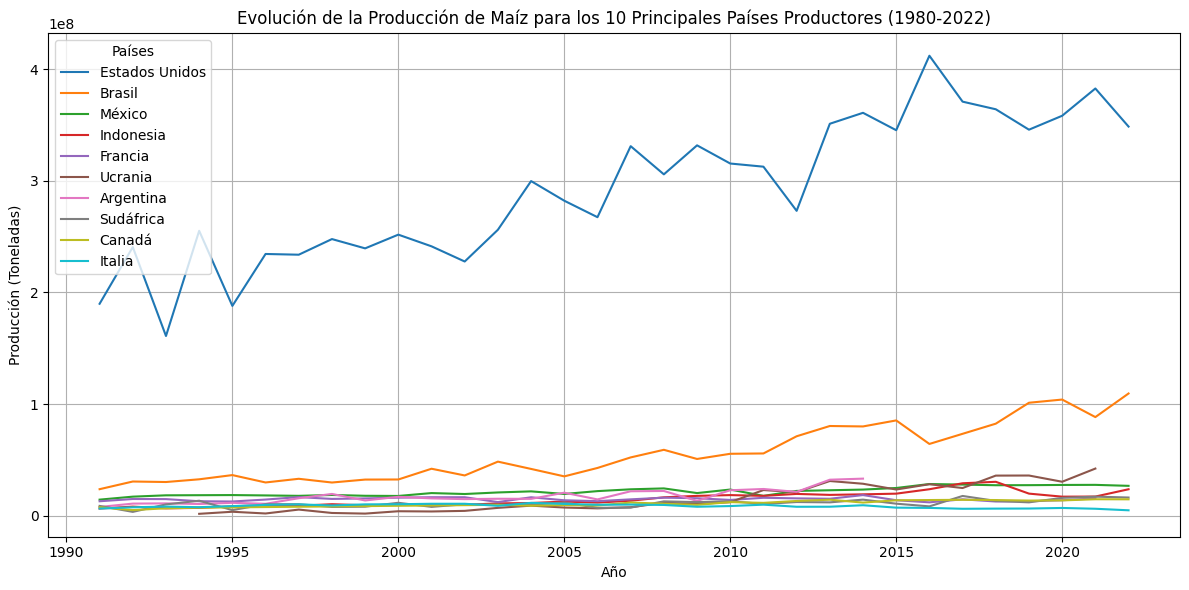

In [ ]:
import matplotlib.pyplot as plt

# Filtrar los 10 países con la mayor producción total de maíz
top_paises = dfPrediccionAgricola_imputado.groupby('Country')['Production'].sum().nlargest(10).index.tolist()

# Filtrar el DataFrame para incluir solo estos 10 países
df_top_paises = dfPrediccionAgricola_imputado[dfPrediccionAgricola_imputado['Country'].isin(top_paises)]

# Gráfico de líneas para la producción de los principales países productores
plt.figure(figsize=(12, 6))
for country in top_paises:
    plt.plot(df_top_paises[df_top_paises['Country'] == country]['Year'],
             df_top_paises[df_top_paises['Country'] == country]['Production'], label=country)

# Añadir título, etiquetas y leyenda
plt.title("Evolución de la Producción de Maíz para los 10 Principales Países Productores (1980-2022)")
plt.xlabel("Año")
plt.ylabel("Producción (Toneladas)")
plt.legend(title="Países", loc='upper left')
plt.grid(True)
plt.tight_layout()

# Guardar gráfico como imagen PNG
plt.savefig("produccion_top_10_paises_incluyendo_usa.png", dpi=300)

# Mostrar gráfico
plt.show()





Como se observa Estados Unidos descompensa el grafico ya que su indice de produccion es totalmente distinto a los del resto, para una mejor visualizacion preferimos filtrar a Estados Unidos

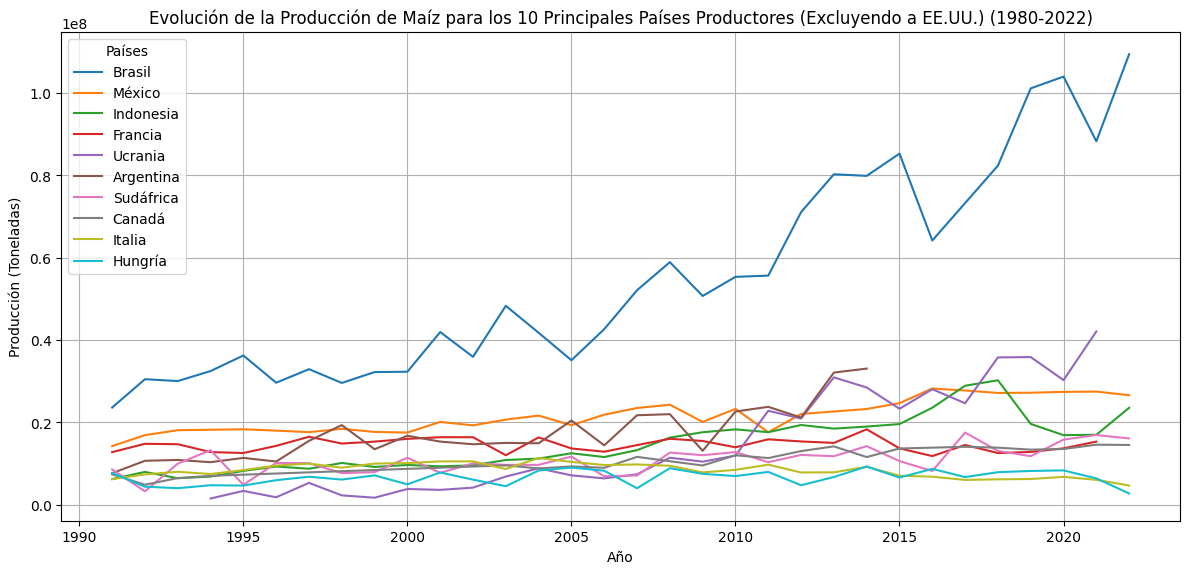

In [ ]:
import matplotlib.pyplot as plt

# Filtrar los 10 países con mayor producción total de maíz, excluyendo a Estados Unidos
top_paises_sin_usa = (
    dfPrediccionAgricola_imputado[dfPrediccionAgricola_imputado['Country'] != 'Estados Unidos']
    .groupby('Country')['Production']
    .sum()
    .nlargest(10)
    .index.tolist()
)

# Filtrar el DataFrame para incluir solo estos 10 países (excluyendo a Estados Unidos)
df_top_paises_sin_usa = dfPrediccionAgricola_imputado[dfPrediccionAgricola_imputado['Country'].isin(top_paises_sin_usa)]

# Gráfico de líneas para la producción de los principales países productores, excluyendo a Estados Unidos
plt.figure(figsize=(12, 6))
for country in top_paises_sin_usa:
    plt.plot(df_top_paises_sin_usa[df_top_paises_sin_usa['Country'] == country]['Year'],
             df_top_paises_sin_usa[df_top_paises_sin_usa['Country'] == country]['Production'], label=country)

# Añadir título, etiquetas y leyenda
plt.title("Evolución de la Producción de Maíz para los 10 Principales Países Productores (Excluyendo a EE.UU.) (1980-2022)")
plt.xlabel("Año")
plt.ylabel("Producción (Toneladas)")
plt.legend(title="Países", loc='upper left')
plt.grid(True)
plt.tight_layout()

# Guardar gráfico como imagen PNG
plt.savefig("produccion_top_10_paises_sin_usa.png", dpi=300)

# Mostrar gráfico
plt.show()



Vamos a ver como se correlaciona la produccion de maiz y la temperatura media anual a lo largo de los años

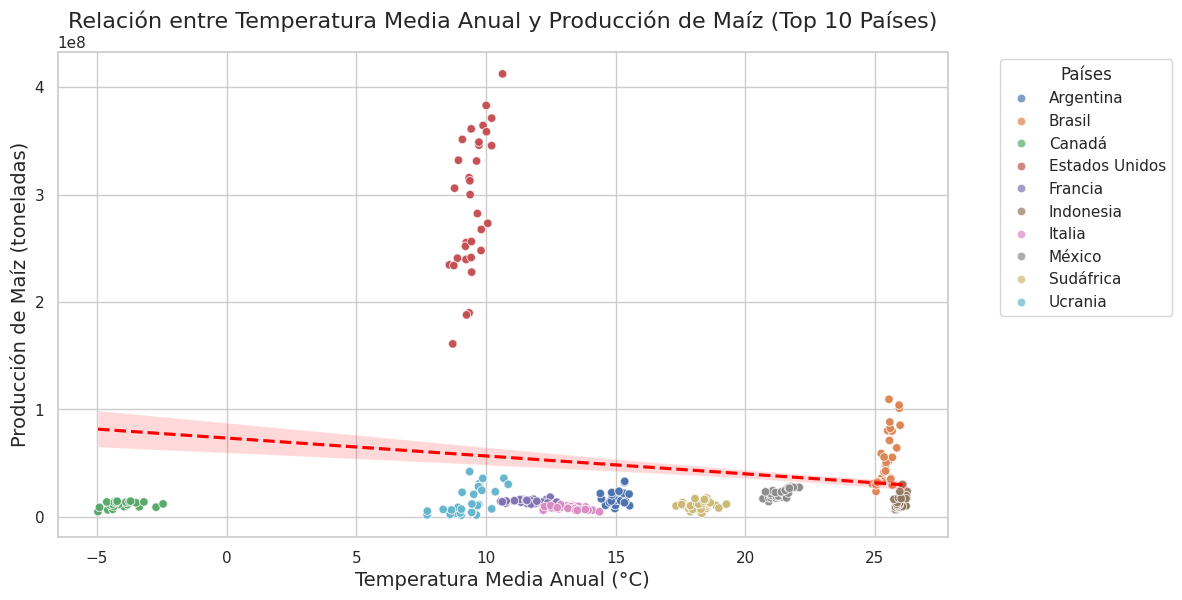

In [ ]:
# Supongamos que tu DataFrame se llama dfPrediccionAgricola_imputado
# Filtrar los 10 países con mayor producción, incluyendo EE. UU. y Brasil
top_10 = dfPrediccionAgricola_imputado.groupby('Country')['Production'].sum().nlargest(10).index
df_top_10 = dfPrediccionAgricola_imputado[dfPrediccionAgricola_imputado['Country'].isin(top_10)]

# Generar el gráfico de dispersión
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(data=df_top_10,
                                x='Annual Mean',
                                y='Production',
                                hue='Country',
                                palette='deep',
                                alpha=0.7)

# Añadir una línea de regresión
sns.regplot(data=df_top_10,
            x='Annual Mean',
            y='Production',
            scatter=False,
            color='red',
            line_kws={"linestyle": "--"})

# Configurar los títulos y etiquetas
plt.title('Relación entre Temperatura Media Anual y Producción de Maíz (Top 10 Países)', fontsize=16)
plt.xlabel('Temperatura Media Anual (°C)', fontsize=14)
plt.ylabel('Producción de Maíz (toneladas)', fontsize=14)
plt.legend(title='Países', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



Luego de ver el grafico llegamos a la conclusion de que paises como Estados Unidos y Brasil tienen producciones masivas a comparacion del resto, para mejorar la visualizcion y y poder entender mejor los posibles insights vamos a filtrar ambos paises en el resto de los graficos

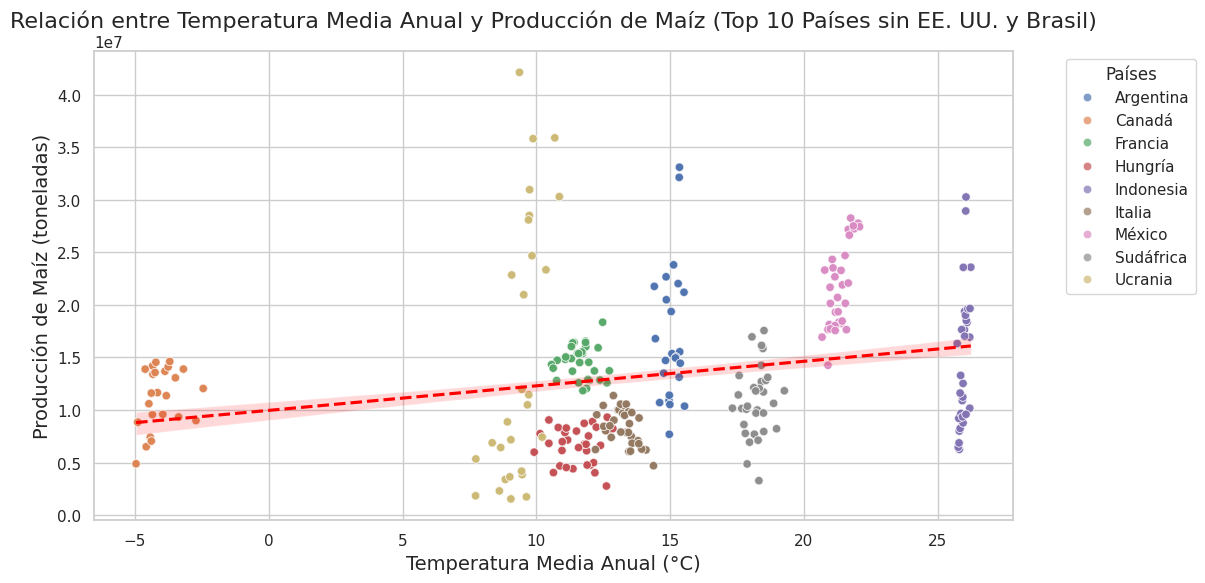

In [ ]:
# Filtrar los datos para eliminar EE. UU. y Brasil
df_filtrado_final = df_top_10[~df_top_10['Country'].isin(['Estados Unidos', 'Brasil'])]

# Generar el gráfico de dispersión
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(data=df_filtrado_final,
                                x='Annual Mean',
                                y='Production',
                                hue='Country',
                                palette='deep',
                                alpha=0.7)

# Añadir una línea de regresión
sns.regplot(data=df_filtrado_final,
            x='Annual Mean',
            y='Production',
            scatter=False,
            color='red',
            line_kws={"linestyle": "--"})

# Configurar los títulos y etiquetas
plt.title('Relación entre Temperatura Media Anual y Producción de Maíz (Top 10 Países sin EE. UU. y Brasil)', fontsize=16)
plt.xlabel('Temperatura Media Anual (°C)', fontsize=14)
plt.ylabel('Producción de Maíz (toneladas)', fontsize=14)
plt.legend(title='Países', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



Podriamos visualizar como el cambio de temperatura a lo largo de los años afecta a la produccion de maiz

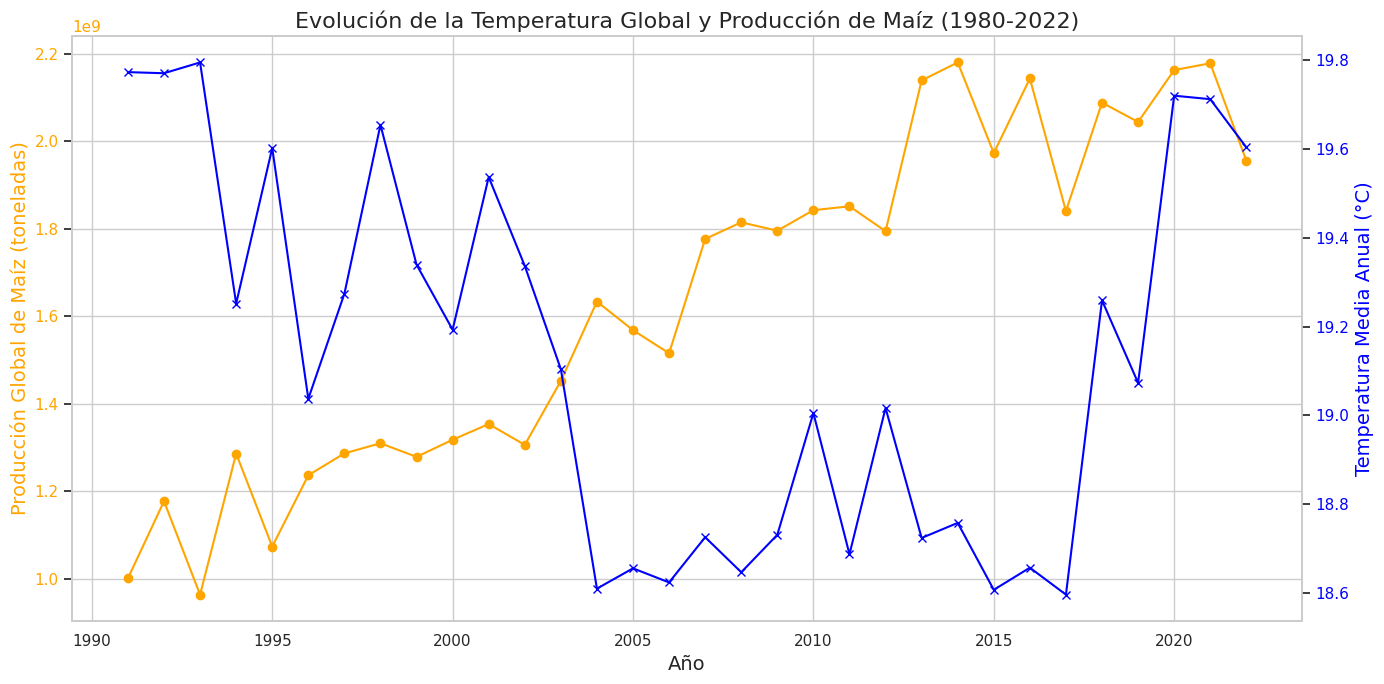

In [ ]:

# Asumimos que 'dfPrediccionAgricola_imputado' es tu DataFrame.
df = dfPrediccionAgricola_imputado

# Agrupar los datos por año y sumar la producción de maíz
production_by_year = df.groupby('Year')['Production'].sum().reset_index()

# Crear un DataFrame con la temperatura media anual por año
temperature_by_year = df.groupby('Year')['Annual Mean'].mean().reset_index()

# Unir ambos DataFrames por el año
combined_data = pd.merge(production_by_year, temperature_by_year, on='Year', suffixes=('_Production', '_Temperature'))

# Configurar el gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Graficar la producción de maíz en el eje Y izquierdo
color = 'orange'
ax1.set_xlabel('Año', fontsize=14)
ax1.set_ylabel('Producción Global de Maíz (toneladas)', color=color, fontsize=14)
ax1.plot(combined_data['Year'], combined_data['Production'], label='Producción Global de Maíz', color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Crear un segundo eje Y para la temperatura
ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('Temperatura Media Anual (°C)', color=color, fontsize=14)
ax2.plot(combined_data['Year'], combined_data['Annual Mean'], label='Temperatura Media Anual', color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

# Configurar el título y mostrar la leyenda
plt.title('Evolución de la Temperatura Global y Producción de Maíz (1980-2022)', fontsize=16)
fig.tight_layout()  # Ajustar el layout para evitar solapamientos
plt.grid()

# Mostrar el gráfico
plt.show()



Ya que vimos que la temperatura afecta directamente a la produccion podemos analizar localmente para entender mejor como es su correlacion.

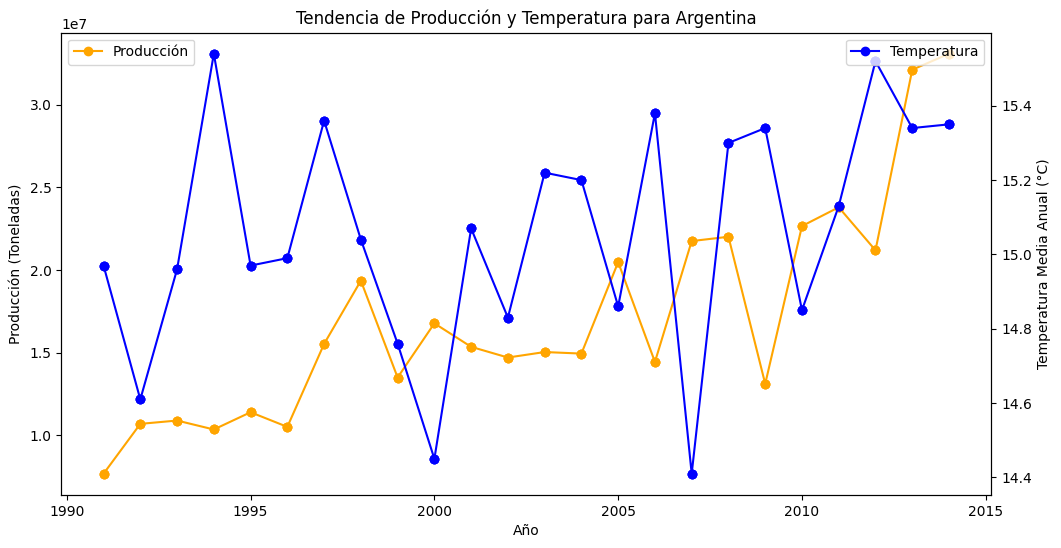

In [ ]:
country_data = dfPrediccionAgricola_imputado[dfPrediccionAgricola_imputado['Country'] == 'Argentina']
plt.figure(figsize=(12, 6))

# Gráfico para producción
ax1 = plt.gca()
ax1.plot(country_data['Year'], country_data['Production'], color='orange', label='Producción', marker='o')
ax1.set_ylabel('Producción (Toneladas)')
ax1.set_xlabel('Año')
ax1.set_title('Tendencia de Producción y Temperatura para Argentina')

# Eje secundario para temperatura
ax2 = ax1.twinx()
ax2.plot(country_data['Year'], country_data['Annual Mean'], color='blue', label='Temperatura', marker='o')
ax2.set_ylabel('Temperatura Media Anual (°C)')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


Una vez que comprendemos y visualizamos que la temperatura afecta de manera directa y es posible utilizarla para predecir la produccion, podemos ver el resto de variables en conjunto para ver si sus relaciones cambian de pais en pais

¿Esto que nos dara?

Esto nos permitira ver como funciona cada pais individualmente y entender un mejor que las variables como cambio climatico, area cosechada, costo de produccion tienen un impacto a la hora de la produccion.
Y aun mejor si tenemos datos de rendimiento de cosechas anteriores esto influye de manera directa en la produccion futura, asi que tambien podemos utilizarlo como una variable de mucha ayuda.

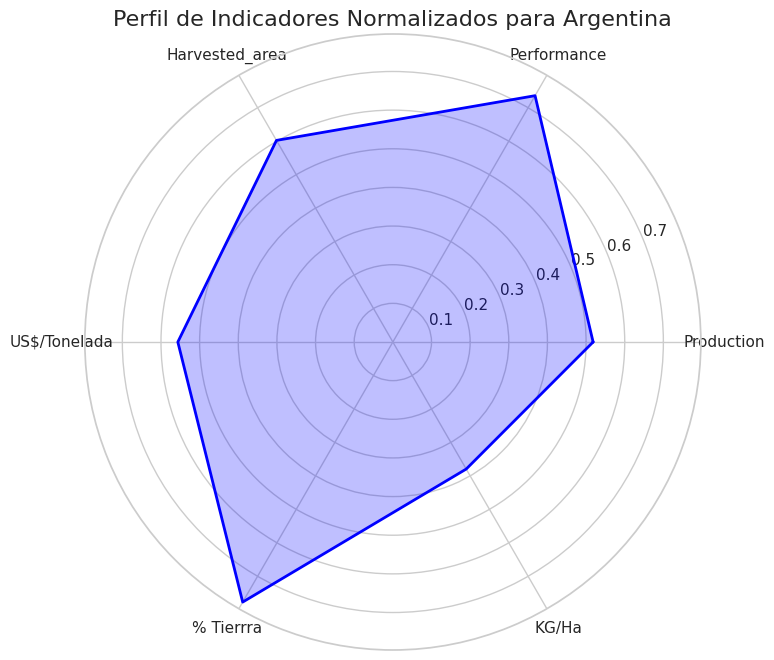

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Asegúrate de que dfPrediccionAgricola_imputado esté disponible
# Seleccionar un país específico
country_data = dfPrediccionAgricola_imputado[dfPrediccionAgricola_imputado['Country'] == 'Argentina']
categories = ['Production', 'Performance', 'Harvested_area', 'US$/Tonelada', '% Tierrra', 'KG/Ha']
values = [country_data[cat].mean() / country_data[cat].max() for cat in categories]  # Normaliza

N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
values += values[:1]  # Para cerrar el círculo
angles += angles[:1]

# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], categories)
ax.plot(angles, values, color='blue', linewidth=2, linestyle='solid')
ax.fill(angles, values, color='blue', alpha=0.25)
plt.title('Perfil de Indicadores Normalizados para Argentina', fontsize=16)
plt.show()


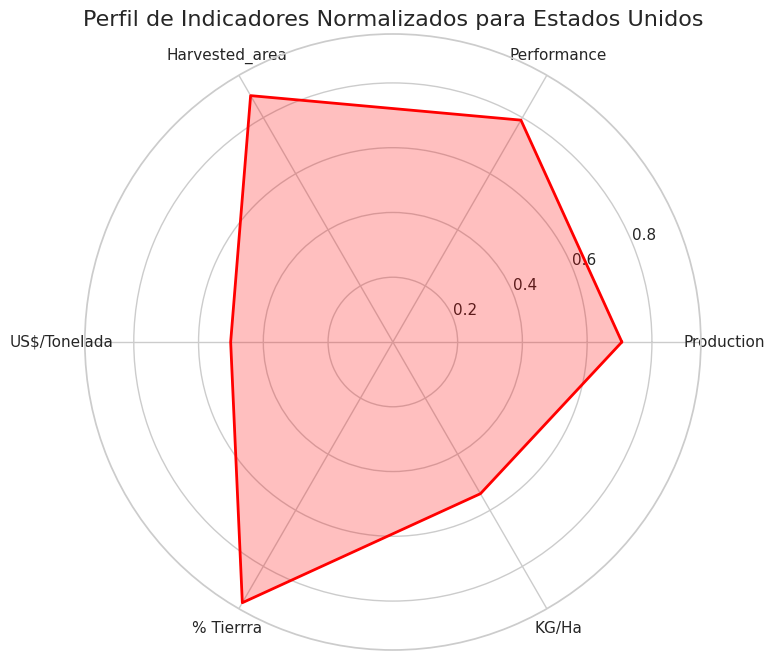

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Asegúrate de que dfPrediccionAgricola_imputado esté disponible
# Seleccionar un país específico
country_data = dfPrediccionAgricola_imputado[dfPrediccionAgricola_imputado['Country'] == 'Estados Unidos']
categories = ['Production', 'Performance', 'Harvested_area', 'US$/Tonelada', '% Tierrra', 'KG/Ha']
values = [country_data[cat].mean() / country_data[cat].max() for cat in categories]  # Normaliza

N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
values += values[:1]  # Para cerrar el círculo
angles += angles[:1]

# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], categories)
ax.plot(angles, values, color='red', linewidth=2, linestyle='solid')
ax.fill(angles, values, color='red', alpha=0.25)
plt.title('Perfil de Indicadores Normalizados para Estados Unidos', fontsize=16)
plt.show()


Una vez realizada ciertas visualizaciones llegamos a varias concluciones.
Primero hay que analizar que hacer con los outliers o los paises con produccion masiva como Estados Unidos.
Ya que filtrarnos nos permite unificar mas el resto de datos, pero al dejarlos el modelo tendria un entendimiento de produccion masiva y podria predecir futuras cosechas de esa magnitud.
Elaborar visualizaciones que permitan ver la correlacion directa entre variables, ya que vimos que el resto de variables influye en la produccion de un pais, una de la mas importantes ademas del clima puede ser la cantidad disponible de tierra para cosechar.